<a href="https://colab.research.google.com/github/saradom11/M-todos-num-ricos-1/blob/main/Eliminacion_Gaussiana.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Eliminación Gaussiana:**
#### Escribir un programa en Python que implemente el Algoritmo 6.1 para resolver ecuaciones lineales (página 276 del Burden). Como prueba, resuelva el Ejemplo 2 de la página 275.

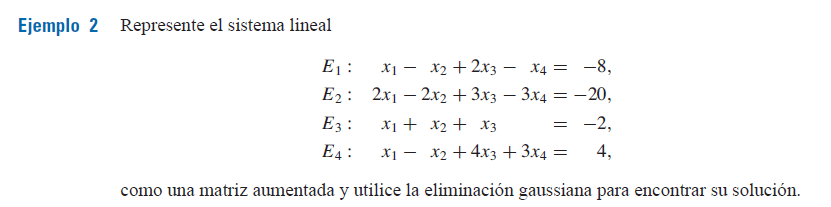

In [1]:
# Primero importamos la librería
import numpy as np

In [3]:
# Ingresamos los datos del ejemplo
A = [[1, -1, 2, -1],
    [2, -2, 3, -3],
    [1, 1, 1, 0],
    [1, -1, 4, 3]]  # La matriz de coeficientes del sistema lineal

b = [-8, -20, -2, 4]   # La matriz de términos independientes

 # Ambas matrices se ponen en el orden de las ecuaciones del sistema

In [4]:
# Número de ecuaciones
n = len(A)

# Realizamos la matriz aumentada
A = np.array(A, dtype=float)   # Convertimos lo que ingresamos en A a un arreglo de numpy
b = np.array(b, dtype=float)   # Convertimos lo que ingresamos en b a un arreglo de numpy
Aug = np.column_stack((A, b))  # Creamos la matriz aumentada [A | b]

In [8]:
# Eliminación Gaussiana:


for i in range(n): # Creamos el ciclo y para cada columna y buscamos el pivote
    # Encontrar el pivote
    p = i
    while p < n and Aug[p, i] == 0:
        p += 1
    if p == n: # Si no encontramos un pivote entonces el sistema no tiene solución única
        print("No existe una solución única")
        break

    # Intercambiar filas si es necesario
    if p != i:
        Aug[[i, p]] = Aug[[p, i]] # Si el pivote no está en la fila actual i, intercambiamos la fila actual con la fila p donde se encuentra el pivote.

    # Eliminación hacia adelante
    for j in range(i + 1, n):
        m = Aug[j, i] / Aug[i, i]  # Calculamos "m" (con la fórmula)
        Aug[j, i:] -= m * Aug[i, i:]  # Realizamos la eliminación

In [9]:
# Verificar si hay solución única
if Aug[n - 1, n - 1] == 0:
    print("No existe una solución única")   # Si el último pivote es cero, el sistema no tiene solución única
else:
    # Sustitución hacia atrás
    x = np.zeros(n)
    for i in range(n - 1, -1, -1): # Resolvemos el sistema desde la última ecuación hacia la primera
        suma = sum(Aug[i, j] * x[j] for j in range(i + 1, n))
        x[i] = (Aug[i, -1] - suma) / Aug[i, i] # Determinamos x_i (con la formula)


In [11]:
# Mostrar la solución
print("Solución del sistema:")
for i, xi in enumerate(x, start=1): # Hacemos esto para que la solucion se muestre desde x_1 hasta x_n
  print(f"x{i} = {xi:.3f}") # Por último, imprimimos la solución redondeada a tres decimales

Solución del sistema:
x1 = -7.000
x2 = 3.000
x3 = 2.000
x4 = 2.000
